# 1. Load the Dataset

In [1]:
import pandas as pd

# Load the dataset (update file path if necessary)
file_path = "creditcard.csv"
df = pd.read_csv(file_path)

# Display dataset overview
print("Dataset Overview:")
print(df.head())

# Check for missing values and basic info
print("\nDataset Info:")
df.info()

# Display class distribution
print("\nClass Distribution:")
print(df['Class'].value_counts())

Dataset Overview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26   

# 2. Data Preprocessing
To handle imbalanced data, we will use undersampling.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine training data for undersampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes
majority = train_data[train_data['Class'] == 0]
minority = train_data[train_data['Class'] == 1]

# Undersample the majority class
majority_undersampled = resample(majority, 
                                 replace=False,    # Sample without replacement
                                 n_samples=len(minority),  # Match minority count
                                 random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_train = pd.concat([majority_undersampled, minority])

# Shuffle the data
undersampled_train = undersampled_train.sample(frac=1, random_state=42)

# Separate features and target for undersampled data
X_train = undersampled_train.drop('Class', axis=1)
y_train = undersampled_train['Class']

print("Class distribution after undersampling:")
print(y_train.value_counts())

Class distribution after undersampling:
Class
1    356
0    356
Name: count, dtype: int64


# 3. Model Training
We will train a Random Forest model to classify transactions.

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


# 4. Model Evaluation
Evaluate the model using accuracy, precision, and recall.

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Precision: 0.06
Recall: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.06      0.94      0.11       136

    accuracy                           0.97     85443
   macro avg       0.53      0.96      0.55     85443
weighted avg       1.00      0.97      0.99     85443



# 5. Outcome
Save the Python script for predicting fraud.

In [5]:
def predict_transaction(transaction):
    prediction = rf_model.predict([transaction])
    return "Fraudulent" if prediction[0] == 1 else "Not Fraudulent"

# Example usage
sample_transaction = X_test.iloc[0].values
print("Prediction for the sample transaction:")
print(predict_transaction(sample_transaction))

Prediction for the sample transaction:
Fraudulent


C:\Users\Touseef Asif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## To improve the accuracy, precision, and recall of your fraud detection model, you can implement several strategies after using undersampling

# 1. Switch to Oversampling (SMOTE or ADASYN)
**Why:** Undersampling discards data from the majority class, which may result in the loss of valuable information. Oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) generate synthetic examples for the minority class without discarding data, improving model performance.

In [6]:
! pip install imbalanced-learn

In [7]:
import imblearn
print(imblearn.__version__)

0.13.0


In [13]:
!pip install --upgrade pip

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the oversampled dataset
rf_model.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.9745561368397645
Precision: 0.05579773321708806
Recall: 0.9411764705882353


# 2. Adjust Classification Threshold
**Why:** By default, a model predicts classes using a probability threshold of 0.5. For fraud detection, lowering the threshold can capture more fraudulent transactions (improving recall) while maintaining acceptable precision.

In [10]:
# Get prediction probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Set a lower threshold (e.g., 0.3)
threshold = 0.3
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("Precision:", precision_score(y_test, y_pred_adjusted))
print("Recall:", recall_score(y_test, y_pred_adjusted))

Accuracy: 0.8913193591049003
Precision: 0.01381509032943677
Recall: 0.9558823529411765


# 3. Feature Selection and Engineering
**Why:** Not all features contribute equally to the model’s performance. Removing irrelevant features or creating new ones can improve both precision and recall.
**Steps:**
1. Use feature importance scores from the Random Forest model to identify key features.
2. Create interaction terms or normalized features that might improve model performance.

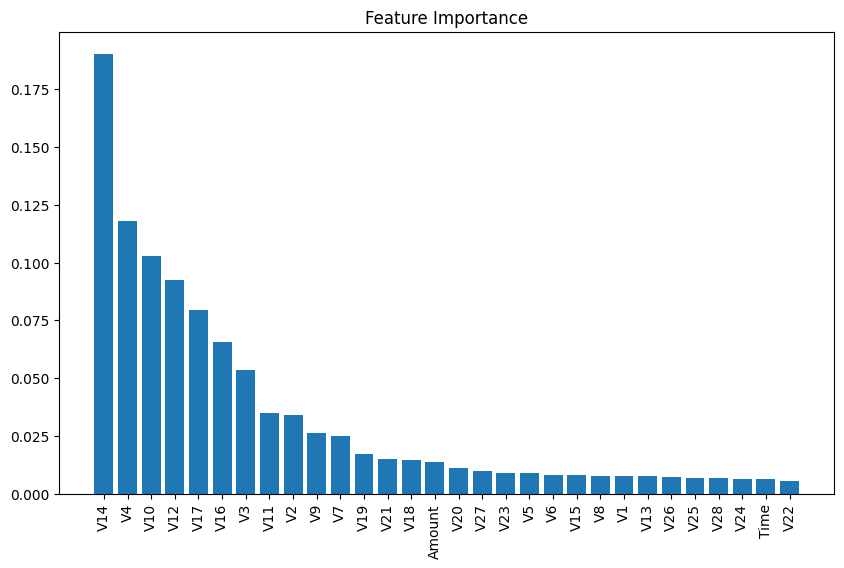

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

# 4. Use an Ensemble Model
**Why:** Ensemble methods (e.g., XGBoost, LightGBM, or CatBoost) are highly effective in handling imbalanced datasets and improving generalization.

In [12]:
!pip install xgboost

In [14]:
import xgboost
print(xgboost.__version__)

2.1.3


In [15]:
from xgboost import XGBClassifier

# Train an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))

Accuracy: 0.9619863534754164
Precision: 0.03800475059382423
Recall: 0.9411764705882353


# 5. Hyperparameter Tuning
**Why:** Optimizing hyperparameters can significantly improve model performance.
**Use GridSearchCV for Hyperparameter Tuning:**

In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='precision', verbose=2)
grid_search.fit(X_resampled, y_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Precision:", precision_score(y_test, y_pred_best))
print("Best Model Recall:", recall_score(y_test, y_pred_best))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf

# 6. Implement Cross-Validation
**Why:** Cross-validation ensures the model generalizes well and is not overfitting.

In [17]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Print average score
print("Cross-validated Accuracy:", cv_scores.mean())

Cross-validated Accuracy: 0.9255490987885354
